Number of Galaxies = 1961905


/tmp/ipykernel_11005/3041505190.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_data = data.groupby('Redshift_bin')['petroRad_r'].median().reset_index()


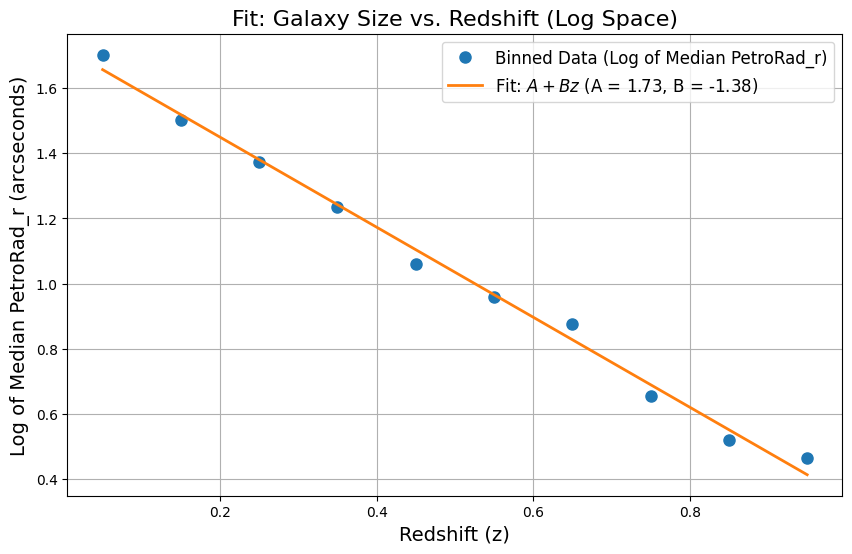

In [2]:
# Re-import necessary libraries due to code reset
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Load the data
file_path = "./KapahiData/MyResult_20241226.csv"
data = pd.read_csv(file_path, delimiter=",")  # Assuming tab-separated values; adjust if different
print("Number of Galaxies =", len(data))
# Bin the data by redshift
bins = pd.interval_range(start=0, end=1, freq=0.1)  # Adjust the range and bin size as needed
data['Redshift_bin'] = pd.cut(data['Redshift'], bins=bins)

# Calculate the median PetroRad_r for each bin
binned_data = data.groupby('Redshift_bin')['petroRad_r'].median().reset_index()
binned_data.columns = ['Redshift_bin', 'Median_petroRad_r']

# Define the model function A + Bz
def size_model(z, A, B):
    return A + B*z

# Extract the midpoint of the redshift bins as numeric values
x_data = binned_data['Redshift_bin'].apply(lambda x: x.mid).astype(float)
y_data = np.log(binned_data['Median_petroRad_r'].values)

# Perform the curve fitting
params, covariance = curve_fit(size_model, x_data, y_data)
A_fit, B_fit = params

# Generate a smooth curve for the fit
z_fit = np.linspace(min(x_data), max(x_data), 100)
petroRad_fit = size_model(z_fit, A_fit, B_fit)

# Plot the original data and the fit
plt.figure(figsize=(10, 6))
plt.plot(x_data, y_data, 'o', label="Binned Data (Log of Median PetroRad_r)", markersize=8)
plt.plot(z_fit, petroRad_fit, '-', label=f"Fit: $A + Bz$ (A = {A_fit:.2f}, B = {B_fit:.2f})", linewidth=2)
plt.xlabel("Redshift (z)", fontsize=14)
plt.ylabel("Log of Median PetroRad_r (arcseconds)", fontsize=14)
plt.title("Fit: Galaxy Size vs. Redshift (Log Space)", fontsize=16)
plt.legend(fontsize=12)
plt.grid()
plt.savefig("./Drawing_For_Publications/Kapahi_SDSSMedian.png")
plt.show()


Number of Galaxies = 1961905


/tmp/ipykernel_11005/2041797372.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_data = data.groupby('Redshift_bin')['petroRad_r'].mean().reset_index()


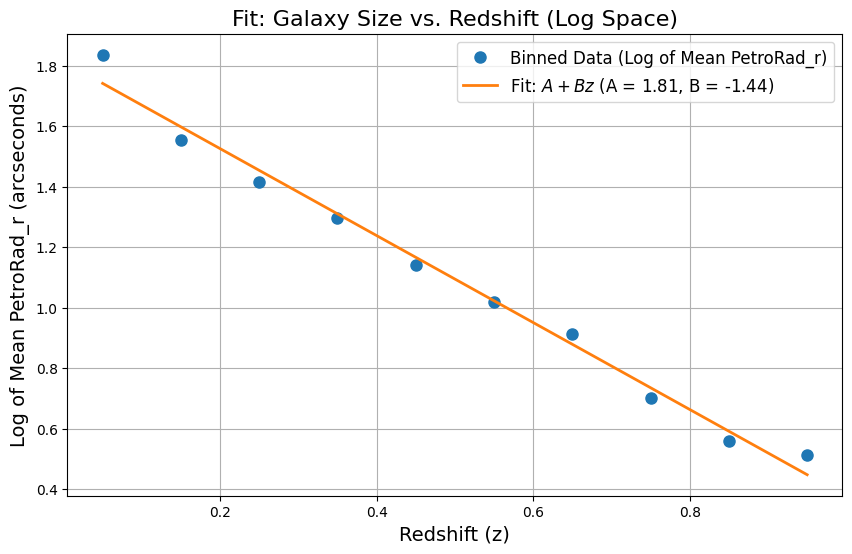

In [3]:
# Re-import necessary libraries due to code reset
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Load the data
file_path = "./KapahiData/MyResult_20241226.csv"
data = pd.read_csv(file_path, delimiter=",")  # Assuming tab-separated values; adjust if different
print("Number of Galaxies =", len(data))
# Bin the data by redshift
bins = pd.interval_range(start=0, end=1, freq=0.1)  # Adjust the range and bin size as needed
data['Redshift_bin'] = pd.cut(data['Redshift'], bins=bins)

# Calculate the mean PetroRad_r for each bin
binned_data = data.groupby('Redshift_bin')['petroRad_r'].mean().reset_index()
binned_data.columns = ['Redshift_bin', 'Mean_petroRad_r']

# Define the model function A + Bz
def size_model(z, A, B):
    return A + B*z

# Extract the midpoint of the redshift bins as numeric values
x_data = binned_data['Redshift_bin'].apply(lambda x: x.mid).astype(float)
y_data = np.log(binned_data['Mean_petroRad_r'].values)

# Perform the curve fitting
params, covariance = curve_fit(size_model, x_data, y_data)
A_fit, B_fit = params

# Generate a smooth curve for the fit
z_fit = np.linspace(min(x_data), max(x_data), 100)
petroRad_fit = size_model(z_fit, A_fit, B_fit)

# Plot the original data and the fit
plt.figure(figsize=(10, 6))
plt.plot(x_data, y_data, 'o', label="Binned Data (Log of Mean PetroRad_r)", markersize=8)
plt.plot(z_fit, petroRad_fit, '-', label=f"Fit: $A + Bz$ (A = {A_fit:.2f}, B = {B_fit:.2f})", linewidth=2)
plt.xlabel("Redshift (z)", fontsize=14)
plt.ylabel("Log of Mean PetroRad_r (arcseconds)", fontsize=14)
plt.title("Fit: Galaxy Size vs. Redshift (Log Space)", fontsize=16)
plt.legend(fontsize=12)
plt.grid()
plt.savefig("./Drawing_For_Publications/Kapahi_SDSSMean.png")
plt.show()
